## Section 1. A Test Notebook

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (9.0, 6.5)

In [2]:
z = np.linspace( 0, 100, 50)
z

array([   0.        ,    2.04081633,    4.08163265,    6.12244898,
          8.16326531,   10.20408163,   12.24489796,   14.28571429,
         16.32653061,   18.36734694,   20.40816327,   22.44897959,
         24.48979592,   26.53061224,   28.57142857,   30.6122449 ,
         32.65306122,   34.69387755,   36.73469388,   38.7755102 ,
         40.81632653,   42.85714286,   44.89795918,   46.93877551,
         48.97959184,   51.02040816,   53.06122449,   55.10204082,
         57.14285714,   59.18367347,   61.2244898 ,   63.26530612,
         65.30612245,   67.34693878,   69.3877551 ,   71.42857143,
         73.46938776,   75.51020408,   77.55102041,   79.59183673,
         81.63265306,   83.67346939,   85.71428571,   87.75510204,
         89.79591837,   91.83673469,   93.87755102,   95.91836735,
         97.95918367,  100.        ])

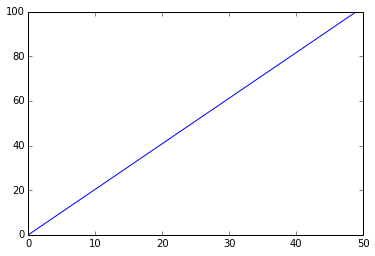

In [9]:
plt.plot(z);

In [4]:
q=z+3
q[0] + q[1]

8.0408163265306118

## Section 2. Goes Here

In [5]:
z=2
def myPrint():
    print z
    
myPrint()

2


hi $\alpha^\gamma = \int_0^\inf \sum \Delta^3$

In [6]:
z[2]
%debug

TypeError: 'int' object has no attribute '__getitem__'

## Section 3. Julia Magic

In [12]:
#%load_ext julia.magic
#%julia @pyimport matplotlib.pyplot as plt
#%julia @pyimport numpy as np

In [ ]:
%%julia

# mix numpy and julia

x = linspace(0,2*pi,1000); # use the julia linspace
y = sin(3*x + 4*np.cos(2*x)); # use the numpy cosine and julia sine
plt.plot(x, y, color="red", linewidth=2.0, linestyle="--")

I would saw this does not really work, kernel segfault above.

## Illustris API - Getting Started

In [198]:
import requests
headers = {"api-key":"3b1618b0629b21396b8af9cbf76caafa"}

baseUrl = "http://www.illustris-project.org/dev409/api/"

def get(path, params=None):
    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()
    
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    
    return r

In [199]:
r = get(baseUrl)

In [200]:
r.keys()

[u'simulations']

In [201]:
len(r['simulations'])

18

In [202]:
r['simulations'][0]

{u'name': u'Illustris-1',
 u'num_snapshots': 134,
 u'url': u'http://www.illustris-project.org/dev409/api/Illustris-1/'}

In [203]:
names = [sim['name'] for sim in r['simulations']]
names

[u'Illustris-1',
 u'Illustris-1-Dark',
 u'Illustris-2',
 u'Illustris-2-Dark',
 u'Illustris-3',
 u'Illustris-3-Dark',
 u'Illustris-1-Subbox0',
 u'Illustris-1-Subbox1',
 u'Illustris-1-Subbox2',
 u'Illustris-1-Subbox3',
 u'Illustris-2-Subbox0',
 u'Illustris-2-Subbox1',
 u'Illustris-2-Subbox2',
 u'Illustris-2-Subbox3',
 u'Illustris-3-Subbox0',
 u'Illustris-3-Subbox1',
 u'Illustris-3-Subbox2',
 u'Illustris-3-Subbox3']

In [204]:
i = names.index('Illustris-3')
i
sim = get( r['simulations'][i]['url'] )

In [205]:
sim.keys()

[u'softening_dm_max_phys',
 u'omega_0',
 u'snapshots',
 u'num_dm',
 u'filesize_sublink',
 u'num_tr_vel',
 u'has_sublink',
 u'checksums',
 u'name_alt',
 u'softening_stars_comoving',
 u'softening_blackholes_max_phys',
 u'z_final',
 u'filesize_ctrees',
 u'has_starformation',
 u'num_files_lhalotree',
 u'is_uniform',
 u'physics_model',
 u'mass_dm',
 u'num_files_groupcat',
 u'softening_gas_factor',
 u'has_rockstar',
 u'is_subbox',
 u'num_files_snapshot',
 u'files',
 u'num_files_sublink',
 u'softening_gas_max_phys',
 u'description',
 u'mass_gas',
 u'child_simulations',
 u'has_blackholes',
 u'has_winds',
 u'has_cooling',
 u'filesize_lhalotree',
 u'has_fof',
 u'has_subfind',
 u'num_tr_mc',
 u'boxsize',
 u'z_start',
 u'num_files_ctrees',
 u'hubble',
 u'name',
 u'num_files_rockstar',
 u'has_ctrees',
 u'url',
 u'num_snapshots',
 u'parent_simulation',
 u'longids',
 u'cosmology',
 u'is_zoom',
 u'softening_stars_max_phys',
 u'has_lhalotree',
 u'omega_L',
 u'permission_required',
 u'omega_B',
 u'softe

In [206]:
sim['num_dm']

94196375

In [207]:
sim['snapshots']
snaps = get( sim['snapshots'] )

In [208]:
len(snaps)

136

In [209]:
snaps[-1]

{u'num_groups_subfind': 121209,
 u'number': 135,
 u'redshift': 2.2204460492503099e-16,
 u'url': u'http://www.illustris-project.org/dev409/api/Illustris-3/snapshots/135/'}

In [210]:
snap = get( snaps[-1]['url'] )

In [212]:
snap

{u'files': {u'groupcat': u'http://www.illustris-project.org/dev409/api/Illustris-3/files/groupcat-135/',
  u'snapshot': u'http://www.illustris-project.org/dev409/api/Illustris-3/files/snapshot-135/'},
 u'filesize_groupcat': 114056740.0,
 u'filesize_rockstar': 0.0,
 u'filesize_snapshot': 23437820660.0,
 u'num_bhs': 33582,
 u'num_dm': 94196375,
 u'num_gas': 87571556,
 u'num_groups_fof': 131727,
 u'num_groups_rockstar': 0,
 u'num_groups_subfind': 121209,
 u'num_stars': 4388167,
 u'num_trmc': 94196375,
 u'number': 135,
 u'redshift': 2.2204460492503099e-16,
 u'simulation': u'http://www.illustris-project.org/dev409/api/Illustris-3/',
 u'subhalos': u'http://www.illustris-project.org/dev409/api/Illustris-3/snapshots/135/subhalos/',
 u'url': u'http://www.illustris-project.org/dev409/api/Illustris-3/snapshots/135/'}

In [226]:
sub = get( snap['subhalos'], {'limit':220} )

In [227]:
len(sub['results'])

220

In [229]:
sub['next']

u'http://www.illustris-project.org/dev409/api/Illustris-3/snapshots/135/subhalos/?limit=220&offset=220'

In [230]:
sub['results'][0]

{u'id': 21246,
 u'mass_log_msun': 10.671343457957859,
 u'url': u'http://www.illustris-project.org/dev409/api/Illustris-3/snapshots/135/subhalos/21246/'}

In [238]:
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )

In [239]:
len(subs['results'])

20

In [240]:
[ subs['results'][i]['id'] for i in range(20) ]

[0,
 1030,
 2074,
 2302,
 2843,
 608,
 5337,
 3315,
 1396,
 4637,
 3053,
 3528,
 4269,
 1801,
 5709,
 4126,
 7144,
 2570,
 2569,
 7187]

In [254]:
sub = get( subs['results'][1]['url'] )

In [260]:
subs['results'][1]['url']

u'http://www.illustris-project.org/dev409/api/Illustris-3/snapshots/135/subhalos/1030/'

In [256]:
url = sub['related']['parent_halo'] + "info.json"
url

u'http://www.illustris-project.org/dev409/api/Illustris-3/snapshots/135/halos/2/info.json'

In [259]:
mpb1 = get( sub['trees']['lhalotree_mpb'] )

ConnectionError: HTTPConnectionPool(host='data.illustris-project.org', port=80): Max retries exceeded with url: /app/tree/lhalotree_mpb/L75n455FP/135/1030/hdf5/?token=7bac069d2342c19b89d1 (Caused by <class 'socket.error'>: [Errno 110] Connection timed out)

In [258]:
qq.history

AttributeError: 'dict' object has no attribute 'history'

## API Cookbook

In [157]:
url = "http://www.illustris-project.org/dev409/api/Illustris-1/snapshots/z=2/subhalos/0/"
r = get(url)
r['mass']

2196.57

In [132]:
mass_min = 10**11.9 / 1e10 * 0.704
mass_max = 10**12.1 / 1e10 * 0.704
search_query = "?mass__gt=" + str(mass_min) + "&mass__lt=" + str(mass_max)
search_query

'?mass__gt=55.9207077246&mass__lt=88.6283489903'

In [134]:
url = "http://www.illustris-project.org/dev409/api/Illustris-1/snapshots/z=2/subhalos/" + search_query
subhalos = get(url)

In [135]:
subhalos['count']

550

In [145]:
ids = [ subhalos['results'][i]['id'] for i in range(10) ]
ids

[109974, 110822, 123175, 107743, 95711, 76124, 124595, 125185, 114316, 108479]

In [156]:
ids = [109974, 110822, 123175, 107743, 95711]
for id in ids:
    url = "http://www.illustris-project.org/dev409/api/illustris-1/snapshots/z=2/subhalos/" + str(id)
    subhalo = get(url)
    print id, subhalo['mass_stars'], subhalo['len_stars']

HTTPError: 500 Server Error: INTERNAL SERVER ERROR

### Illustris Script Examples (Plots)

In [41]:
import illustris_python as il
basePath = '/n/home07/dnelson/sims.illustris/Illustris-3/output/'

In [3]:
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath,135,fields=fields)

In [4]:
subhalos.keys()

['count', 'SubhaloSFRinRad', 'SubhaloMass']

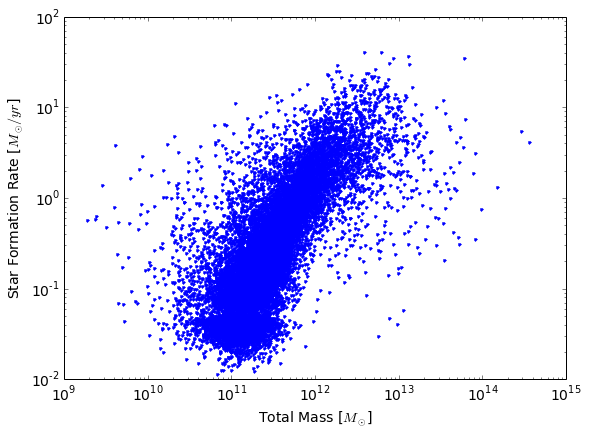

In [18]:
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

In [29]:
GroupFirstSub = il.groupcat.loadHalos(basePath,135,fields=['GroupFirstSub'])
GroupFirstSub.shape

(131727,)

In [55]:
ptGas = il.snapshot.partTypeNum('gas')
ptStars = il.snapshot.partTypeNum('stars')

for i in range(10):
    all_fields = il.groupcat.loadSingle(basePath,135,subhaloID=GroupFirstSub[i])
    gas_mass   = all_fields['SubhaloMassInHalfRadType'][ptGas]
    stars_mass = all_fields['SubhaloMassInHalfRadType'][ptStars]
    
    frac = gas_mass / (gas_mass + stars_mass)
    print GroupFirstSub[i],frac

0 0.0688846
608 0.0236937
1030 0.0638515
1396 0.00357705
1801 0.1222
2074 0.0153271
2302 0.0110673
2569 0.00644513
2843 0.00365279
3053 0.00674058


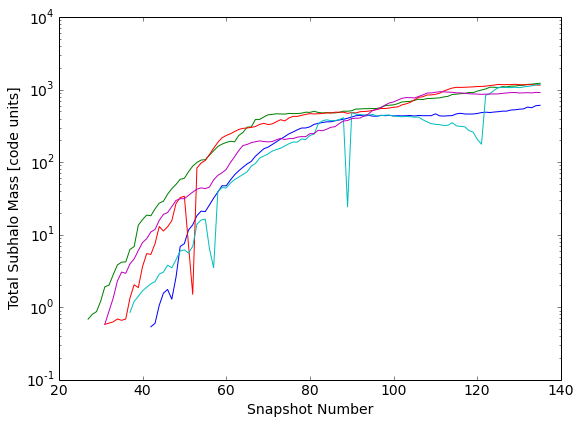

In [61]:
fields = ['SubhaloMass','SubfindID','SnapNum']
for i in range(100,105):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
    
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')

In [62]:
gas_mass=il.snapshot.loadSubset(basePath,135,'gas',fields=['Masses'])

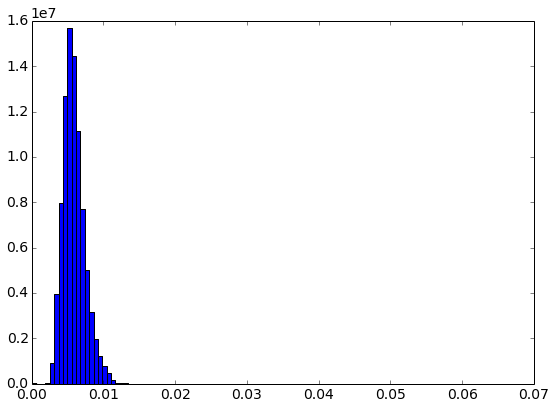

In [64]:
plt.hist(gas_mass,bins=100);

In [66]:
dm_pos = il.snapshot.loadSubset(basePath,135,'dm',['Coordinates']);

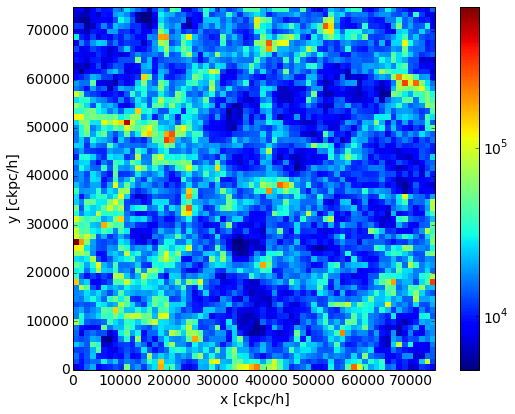

In [79]:
import matplotlib as mpl
plt.hist2d(dm_pos[:,0], dm_pos[:,1], norm=mpl.colors.LogNorm(), bins=64);
plt.xlim([0,75000])
plt.ylim([0,75000])
plt.axes().set_aspect('equal')
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')
plt.colorbar();